In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sns
import logging
import anndata

In [2]:

from matplotlib import colors
# color_map
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)


sc.settings.set_figure_params(dpi=120)

In [3]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
sc.logging.print_versions()

-----
anndata     0.9.0.dev35+g6473f20
scanpy      1.8.2
sinfo       0.3.1
-----
PIL                 7.2.0
anndata             0.9.0.dev35+g6473f20
appnope             0.1.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cairo               1.19.1
cffi                1.14.0
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
google              NA
h5py                3.7.0
hypergeom_ufunc     NA
igraph              0.8.2
ipykernel           5.3.3
ipython_genutils    0.2.0
ipywidgets          7.5.1
jedi                0.17.2
joblib              0.16.0
kiwisolver          1.2.0
leidenalg           0.8.1
llvmlite            0.37.0
louvain             0.6.1
matplotlib          3.5.0
mpl_toolkits        NA
natsort             7.0.1
nbinom_ufunc        NA
numba               0.54.1
numexpr             2.7.1
numpy               1.19.5
packaging           21.3
pandas              1.0.5
parso               0.7.0
pexpect 

In [4]:
import os
import sys

In [5]:
sc.set_figure_params(scanpy=True, dpi_save=400,dpi=150)

In [6]:
read_dir_roadmap = "..//pipeline_objects/roadmap/"

In [14]:
adata_roadmap = sc.read(read_dir_roadmap + "final_peer_maehr.h5ad")

In [10]:
adata_raw = sc.read(read_dir_roadmap + "merged_peer_maehr_umis_with_genes_filtered.h5ad") 

In [15]:
# subset to the final set of cells used 
adata_raw = adata_raw[adata_roadmap.obs.index,:]
cnt = 0
for entry in adata_raw.obs.index:
    if entry != adata_roadmap.obs.index[cnt]:
        print(entry)
    cnt = cnt + 1

In [18]:
adata_raw.obs['all_sample'] = adata_roadmap.obs['samp_all']

<ipython-input-18-4fe403865f97>:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_raw.obs['all_sample'] = adata_roadmap.obs['samp_all']


## find hvgs etc

In [19]:
sc.pp.normalize_total(adata_raw, target_sum=1e4)
sc.pp.log1p(adata_raw)
cc_genes_teichmann = "AC004381.6, ACAT2, ACOT7, ACSL3, ACTL6A, ACYP1, ADK, AIFM1, ALYREF, ANKRD36C, ANLN, ANP32B, ANP32E, AP000251.3, ARHGAP11A, ARHGAP11B, ARHGAP33, ARHGEF39, ASF1B, ASPM, ASRGL1, ATAD2, ATAD5, ATP5G1, ATP8B3, AURKA, AURKB, BAG2, BARD1, BAZ1B, BCL2L12, BIRC5, BLM, BLMH, BOP1, BORA, BRCA1, BRCA2, BRD7, BRD8, BRIP1, BUB1, BUB1B, BUB3, BUD13, C16orf91, C19orf48, C1QBP, C1orf112, C1orf35, C21orf58, C4orf27, C4orf46, C5orf34, C8orf88, C9orf40, CARHSP1, CASC5, CASP8AP2, CBX2, CBX5, CCDC14, CCDC15, CCDC167, CCDC18, CCDC34, CCDC58, CCDC86, CCNA2, CCNB1, CCNB2, CCNE2, CCNF, CCP110, CCSAP, CDC20, CDC25A, CDC25B, CDC25C, CDC27, CDC45, CDC6, CDC7, CDCA2, CDCA3, CDCA4, CDCA5, CDCA7, CDCA8, CDK1, CDK2, CDK5RAP2, CDKN2AIP, CDKN3, CDT1, CENPA, CENPE, CENPF, CENPH, CENPJ, CENPK, CENPL, CENPM, CENPN, CENPO, CENPP, CENPQ, CENPU, CENPV, CENPW, CEP152, CEP55, CEP57L1, CEP76, CEP78, CEP97, CHAC2, CHAF1A, CHAF1B, CHEK1, CISD1, CIT, CKAP2, CKAP2L, CKAP5, CKLF, CKS1B, CKS2, CLGN, CLSPN, CMSS1, CNP, CRNDE, CSE1L, CTC-260E6.6, CTCF, CTDSPL2, CTNNAL1, CTPS1, DAZAP1, DBF4, DCAF12, DDB2, DDX11,DDX39A, DEK, DEPDC1, DEPDC1B, DHCR24, DHFR, DIAPH3, DLEU2, DLGAP5, DNA2, DNAJC9, DNMT1, DSCC1, DSG2, DSN1, DTL, DTYMK, DUT, E2F2, E2F7, E2F8, EBNA1BP2, ECT2, EIF1AY, ELP5, EMC9, ENO2, ENOSF1, EPCAM, ERCC6L, ERH, ERI2, ESCO2, ESPL1, EXO1, EXOC5, EXOSC5, EXOSC8, EXOSC9, EZH2, FAIM, FAM111A, FAM111B, FAM122B, FAM221A, FAM64A, FAM72B, FAM76B, FAM83D, FANCA, FANCD2, FANCG, FANCI, FBXO5, FEN1, FH, FHL2, FKBP5, FOXM1, G2E3, GALK1, GAPDH, GAR1, GARS, GEN1, GGH, GINS1, GINS2, GINS4, GKAP1, GLRX5, GMCL1, GMNN, GMPPB, GOT2, GPANK1, GPATCH4, GPN3, GPSM2, GSG2, GTF3A, GTF3C5, GTSE1, H1FX, H2AFV, H2AFX, H2AFY, H2AFZ, HADH, HAT1, HAUS6, HELLS, HIRIP3, HIST1H1A, HIST1H1B, HIST1H1D, HIST1H1E, HIST1H2AH, HIST1H2AM, HIST1H3G, HIST1H4C, HIST2H2AC, HIST3H2A, HJURP, HLTF, HMGA2, HMGB1, HMGB2, HMGB3, HMGCS1, HMGN2, HMGN5, HMGXB4, HMMR, HN1, HNRNPLL, HNRNPR, HPRT1, HSPA14, HSPB11, IARS, IDH2, IFRD2, IGF2BP1, ILF2, IMMP1L, INCENP, ING2, ITGB3BP, JAM3, KCTD9, KDM1A, KIAA0101, KIAA1524, KIF11, KIF14, KIF15, KIF18A, KIF18B, KIF20A, KIF20B, KIF22, KIF23, KIF2C, KIF4A, KIFC1, KLHL23, KMT5A, KNSTRN, KNTC1, KPNA2, LDHA, LDLR, LEO1, LIG1, LIN9, LMNB1, LMNB2, LRR1, LRRC42, LRRCC1, LSM4, MAD2L1, MAD2L2, MAGOHB, MASTL, MCM10, MCM2, MCM3, MCM4, MCM5, MCM6, MCM7, MCM8, MELK, MGME1, MIS18A, MIS18BP1, MKI67, MLH1, MMS22L, MND1, MNS1, MRPS2, MRPS23, MRTO4, MSH2, MSH6, MTFR2, MTHFD1, MTHFD2, MXD3, MYBL2, MYEF2, MZT1, NAE1, NASP, NCAPD2, NCAPD3, NCAPG, NCAPG2, NCAPH, NCAPH2, NCBP2-AS2, NDC80, NEDD1, NEIL3, NEK2, NFYB, NOP14, NOP16, NRM, NTPCR, NUCKS1, NUDT1, NUDT15, NUDT8, NUF2, NUP107, NUP155, NUP37, NUP50, NUP93, NUSAP1, ODF2, OIP5, ORC1, ORC6, OXCT1, PAICS, PARPBP, PAWR, PBK, PCNA, PDCD2, PGAM1, PGP, PHF19, PHGDH, PIDD1, PIF1, PKMYT1, PLCB4, PLK1, PLK4, PM20D2, POC1A, POLA1, POLA2, POLD1, POLD3, POLE, POLE2, POLQ, POLR2D, POLR3K, POP7, PPA1, PPIL1, PRC1, PRDX2, PRIM1, PRIM2, PRKDC, PRPS1, PRR11, PRSS21, PSIP1, PSMC3IP, PSMG1, PSMG3, PSRC1, PTMA, PTTG1, PUM3, PXMP2, RACGAP1, RAD18, RAD21, RAD51, RAD51AP1, RAD51C, RAD54L, RAN, RANBP1, RANGAP1, RBBP8, RBL1, RCC1, RDM1, RFC2, RFC3, RFC4, RFC5, RFWD3, RHEB, RHNO1, RMI1, RMI2, RNASEH2A, RNF168, RP11-196G18.23, RPA1, RPA3, RPL39L, RPS4Y1, RRM1, RRM2, RTKN2, RUVBL1, SAAL1, SAC3D1, SAE1, SAMD1, SASS6, SEH1L, SFXN4, SGOL1, SGOL2, SGTA, SHCBP1, SHMT1, SIVA1, SKA1, SKA2, SKA3, SKP2, SLC16A1, SLC2A1, SLC39A8, SLC43A3, SLC7A3, SLF1, SLFN13, SMC1A, SMC2, SMC3, SMC4, SNRNP48, SNRPD1, SPAG5, SPC24, SPC25, SPDL1, SRD5A3, SRM, SSRP1, STIL, STMN1, SUV39H2, SVIP, TACC3, TCF19, TCOF1, TDP1, TEX30, TFDP1, THOC3, THOC6, THOP1, TICRR, TIMELESS, TK1, TM7SF3, TMEM106C, TMEM237, TMEM97, TMPO, TOMM40, TOMM5, TOP2A, TOPBP1, TPGS2, TPX2, TRAIP, TRAP1, TRIP13, TROAP, TTF2, TTK, TUBA1B, TUBB, TUBB4B, TUBG1, TXN, TXNRD1, TYMS, UBE2C, UBE2S, UBE2T, UBR7, UCHL5, UCK2, UHRF1, UNG, USP1, USP39, VRK1, WDHD1, WDR34, WDR43, WDR62, WDR76, WDR77, WEE1, WHSC1, XRCC6BP1, YBX1, YDJC, YEATS4, ZGRF1, ZNF714, ZNF738, ZWILCH, ZWINT"
cc_genes_teichmann = [entry.capitalize() for entry in cc_genes_teichmann.split(', ')]
cc_genes_teichmann_int = list(set(adata_raw.var.index).intersection(set(cc_genes_teichmann)))
mt_genes = []

rpl_genes = []
rps_genes = []

mt_rpl_genes = []
mt_rps_genes = []


mt_genes = list(adata_raw.var[adata_raw.var_names.str.startswith('mt-')].index)
rpl_genes = list(adata_raw.var[adata_raw.var_names.str.startswith('Rpl')].index)
rps_genes = list(adata_raw.var[adata_raw.var_names.str.startswith('Rps')].index)
mt_rpl_genes  = list(adata_raw.var[adata_raw.var_names.str.startswith('Mrpl')].index)
mt_rps_genes  = list(adata_raw.var[adata_raw.var_names.str.startswith('Mrps')].index)
adata_raw.var['Mt'] = adata_raw.var_names.str.startswith('mt-')
adata_raw.var['Rpl'] = adata_raw.var_names.str.startswith('Rpl')
adata_raw.var['Rps'] = adata_raw.var_names.str.startswith('Rps')
adata_raw.var['Mrps'] = adata_raw.var_names.str.startswith('Mrps')
adata_raw.var['Mrpl'] = adata_raw.var_names.str.startswith('Mrpl')
adata_raw.var['Mt_Ribo_gene'] = adata_raw.var['Mt'].astype('int') + adata_raw.var['Rpl'].astype('int') + adata_raw.var['Rps'].astype('int') + adata_raw.var['Mrps'].astype('int') + adata_raw.var['Mrpl'].astype('int')
adata_raw.var['teichmann_cc_gene'] = False
adata_raw.var.loc[cc_genes_teichmann_int,'teichmann_cc_gene'] = True
adata_tmp = adata_raw[:,(adata_raw.var['teichmann_cc_gene']==False) & (adata_raw.var['Mt_Ribo_gene']==0)].copy()
sc.pp.highly_variable_genes(adata_tmp, min_mean=0.0125, max_mean=3, min_disp=0.5)

normalizing counts per cell
    finished (0:00:01)
extracting highly variable genes
    finished (0:00:05)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [20]:
adata_tmp[:,adata_tmp.var.highly_variable].shape

(76894, 2091)

In [21]:
adata_raw.var['highly_variable'] = False
adata_raw.var.loc[list(adata_tmp[:,adata_tmp.var.highly_variable].var.index),'highly_variable'] = True
adata_raw[:,adata_raw.var.highly_variable].shape

(76894, 2091)

In [23]:
adata_raw.raw = adata_raw

In [24]:
adata = adata_raw.copy()
del adata_raw

In [25]:
cnt = 0
for entry in adata.obs.index:
    if entry != adata_roadmap.obs.index[cnt]:
        print(entry)
    cnt = cnt + 1

In [26]:
adata.obs['curated_annotation'] = adata_roadmap.obs['curated_annotation']
adata.obs['all_day'] = adata_roadmap.obs['all_day']

In [27]:
del adata_roadmap
adata.raw = adata

In [28]:
samp_order = []
for entry in adata.obs['all_sample'].cat.categories:
    samp_order.extend(adata[adata.obs['all_sample']==entry].obs.index)

In [29]:
adata = adata[samp_order,]

computing PCA
    on highly variable genes
    with n_comps=1000
    finished (0:02:46)


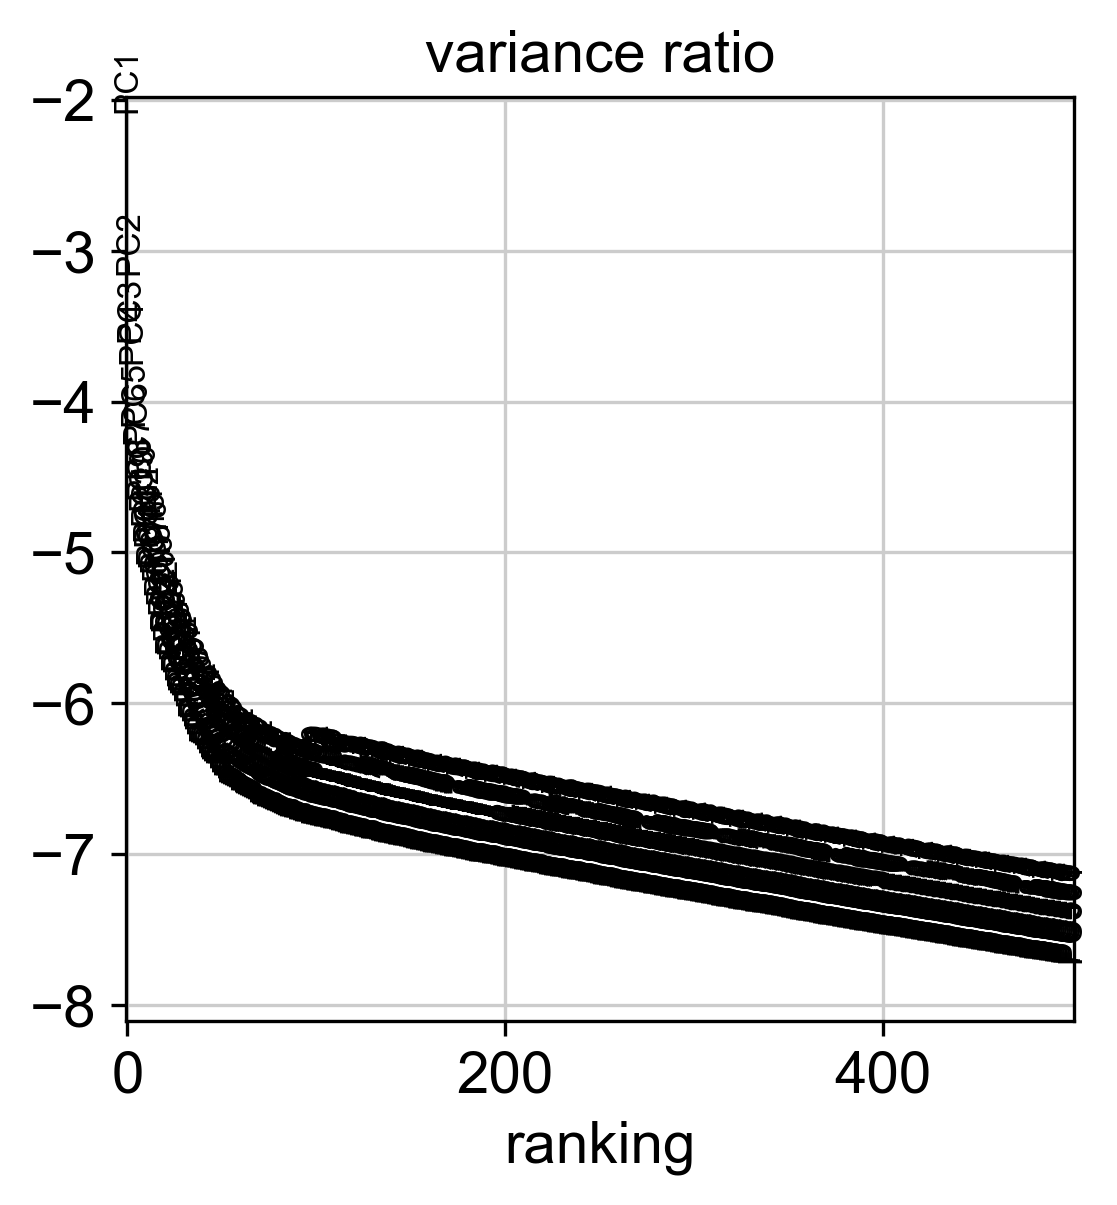

In [30]:
sc.pp.pca(adata, n_comps=1000, use_highly_variable=True, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=500)

In [31]:
timepoints = adata.obs['all_day'].cat.categories.tolist()
timepoint_connections = pd.DataFrame(np.array([timepoints[:-1], timepoints[1:]]).T)

In [32]:
timepoint_connections

,0,1
0,E3.5,E4.5
1,E4.5,E5.5
2,E5.5,E6.5
3,E6.5,E7.5
4,E7.5,E8.75
5,E8.75,E9.5
6,E9.5,E10.5
7,E10.5,E11.5
8,E11.5,E12.5


In [33]:
pca_df = pd.DataFrame(adata.obsm['X_pca'],index=adata.obs.index)

In [34]:
import harmony


# Plotting and miscellaneous imports
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Initialize random seed
import random
random.seed(101)

%matplotlib inline

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


Nearest neighbor computation...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:47)


/Users/LoboM/miniconda3/envs/sc-tutorial-0720/lib/python3.8/site-packages/harmony/core.py:70: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  kNN = temp.uns['neighbors']['distances']


Constucting affinities between E3.5 and E4.5...
t+1 neighbors of t...
t neighbors of t+1...
Constucting affinities between E4.5 and E5.5...
t+1 neighbors of t...
t neighbors of t+1...
Constucting affinities between E5.5 and E6.5...
t+1 neighbors of t...
t neighbors of t+1...
Constucting affinities between E6.5 and E7.5...
t+1 neighbors of t...
t neighbors of t+1...
Constucting affinities between E7.5 and E8.75...
t+1 neighbors of t...
t neighbors of t+1...
Constucting affinities between E8.75 and E9.5...
t+1 neighbors of t...
t neighbors of t+1...
Constucting affinities between E9.5 and E10.5...
t+1 neighbors of t...
t neighbors of t+1...
Constucting affinities between E10.5 and E11.5...
t+1 neighbors of t...
t neighbors of t+1...
Constucting affinities between E11.5 and E12.5...
t+1 neighbors of t...
t neighbors of t+1...


100%|██████████| 500/500 [10:45<00:00,  1.29s/it]


BarnesHut Approximation  took  259.18  seconds
Repulsion forces  took  358.28  seconds
Gravitational forces  took  1.47  seconds
Attraction forces  took  11.39  seconds
AdjustSpeedAndApplyForces step  took  7.94  seconds
100


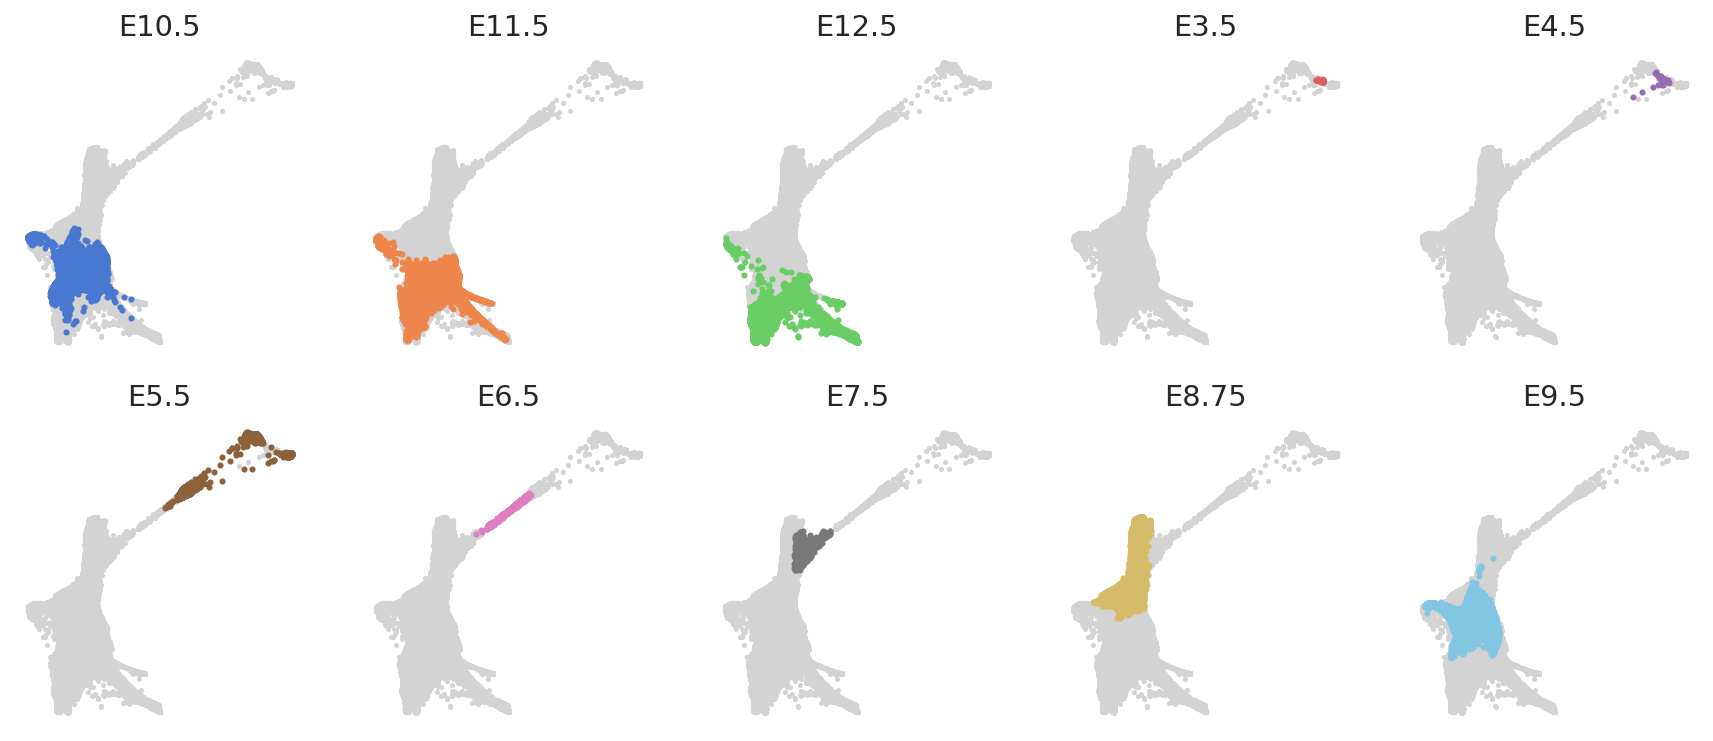

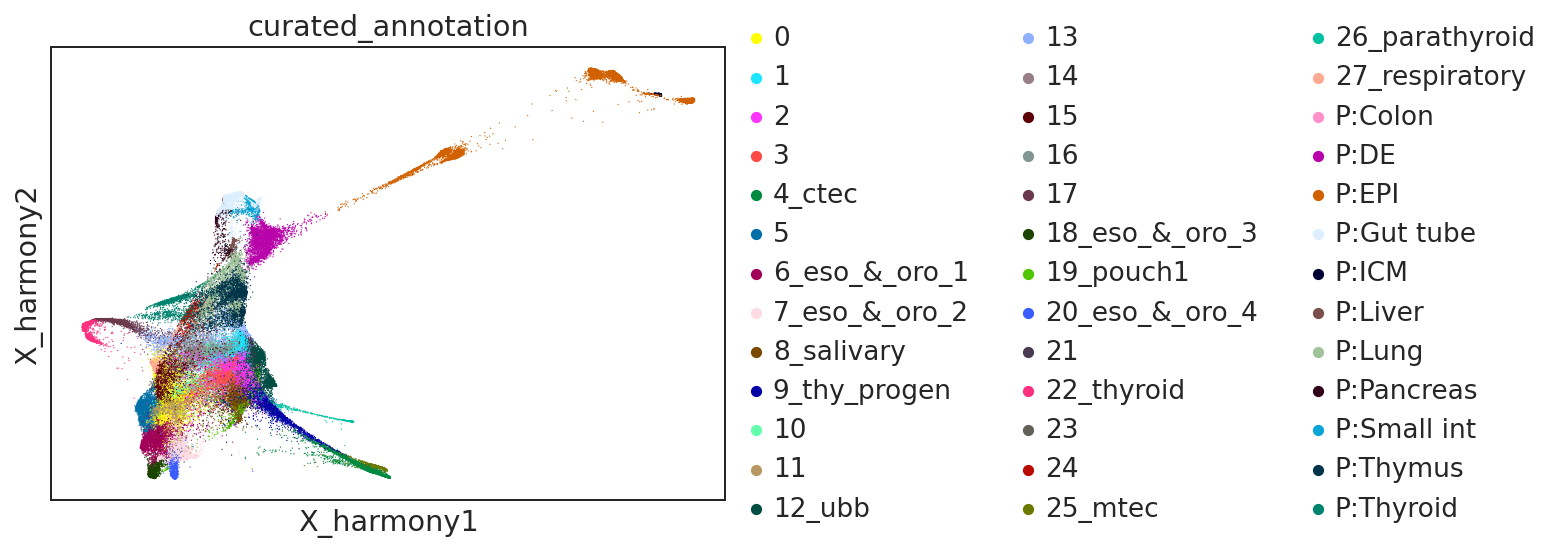

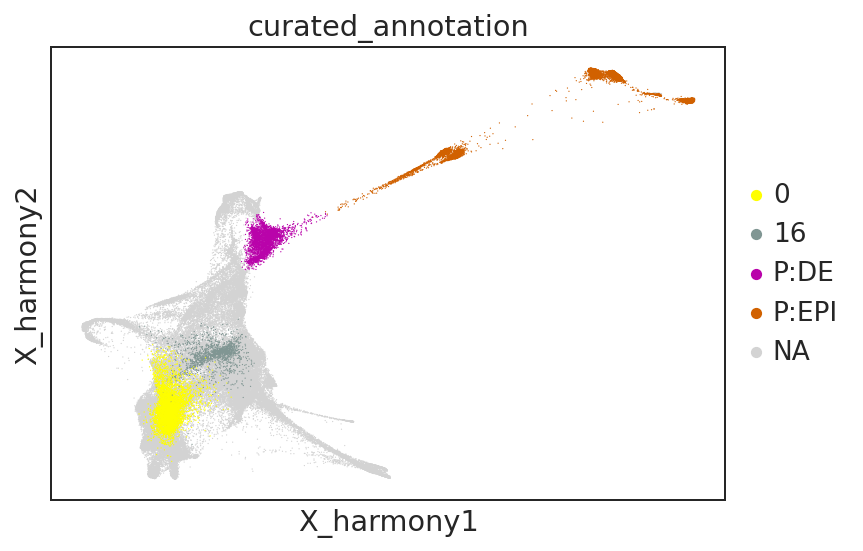

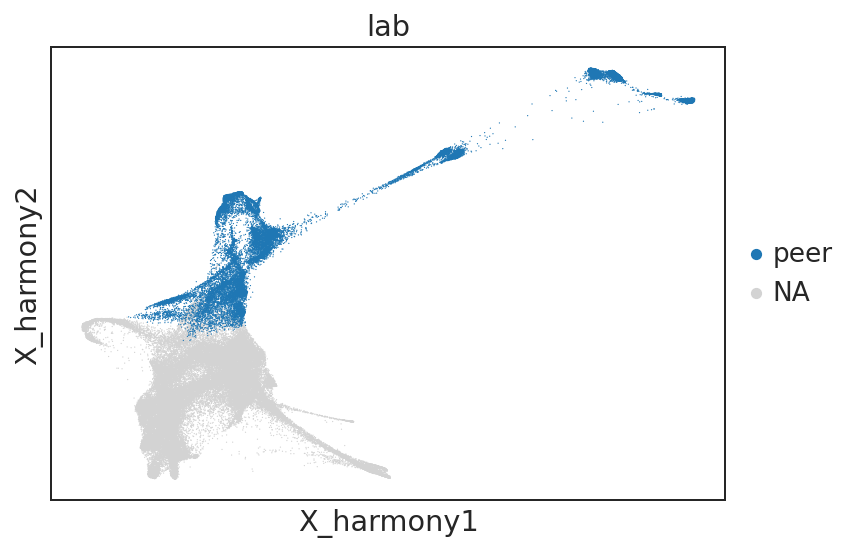

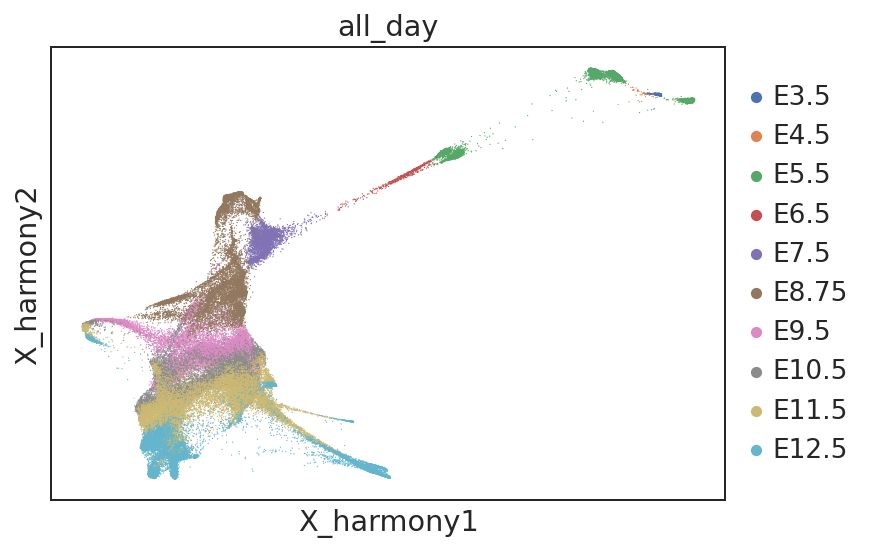

In [35]:
np.random.seed(0)

for npcs in [100]:
    tp ='all_day'        
    # compute the augmented and non-augmented affinity matrices
    aug_aff, aff = harmony.core.augmented_affinity_matrix(
        data_df=pca_df.loc[:,0:npcs],
        timepoints=adata.obs[tp],
        timepoint_connections=timepoint_connections,pc_components=None
    )
    layout = harmony.plot.force_directed_layout(aug_aff, adata.obs.index)
    harmony.plot.plot_timepoints(layout, adata.obs[tp])
    
    
    adata.obsm["X_harmony"] = np.asarray(layout)
    adata.obsp["harmony_aff"] = aff
    adata.obsp["harmony_aff_aug"] = aug_aff
    adata.uns["harmony_timepoint_var"] = tp
    adata.uns["harmony_timepoint_connections"] = np.asarray(timepoint_connections)
    
    
    print(npcs)
    
    sc.pl.embedding(adata,basis='X_harmony',color='curated_annotation')
    sc.pl.embedding(adata,basis='X_harmony',color='curated_annotation',groups=['P:EPI','P:DE','0','16'])
    sc.pl.embedding(adata,basis='X_harmony',color='lab',groups='peer')
    sc.pl.embedding(adata,basis='X_harmony',color='all_day')

    
    print('\n\n')

In [36]:
sc.set_figure_params(scanpy=True, dpi_save=400,dpi=150)
plt.rcParams['figure.figsize']=(5,5)

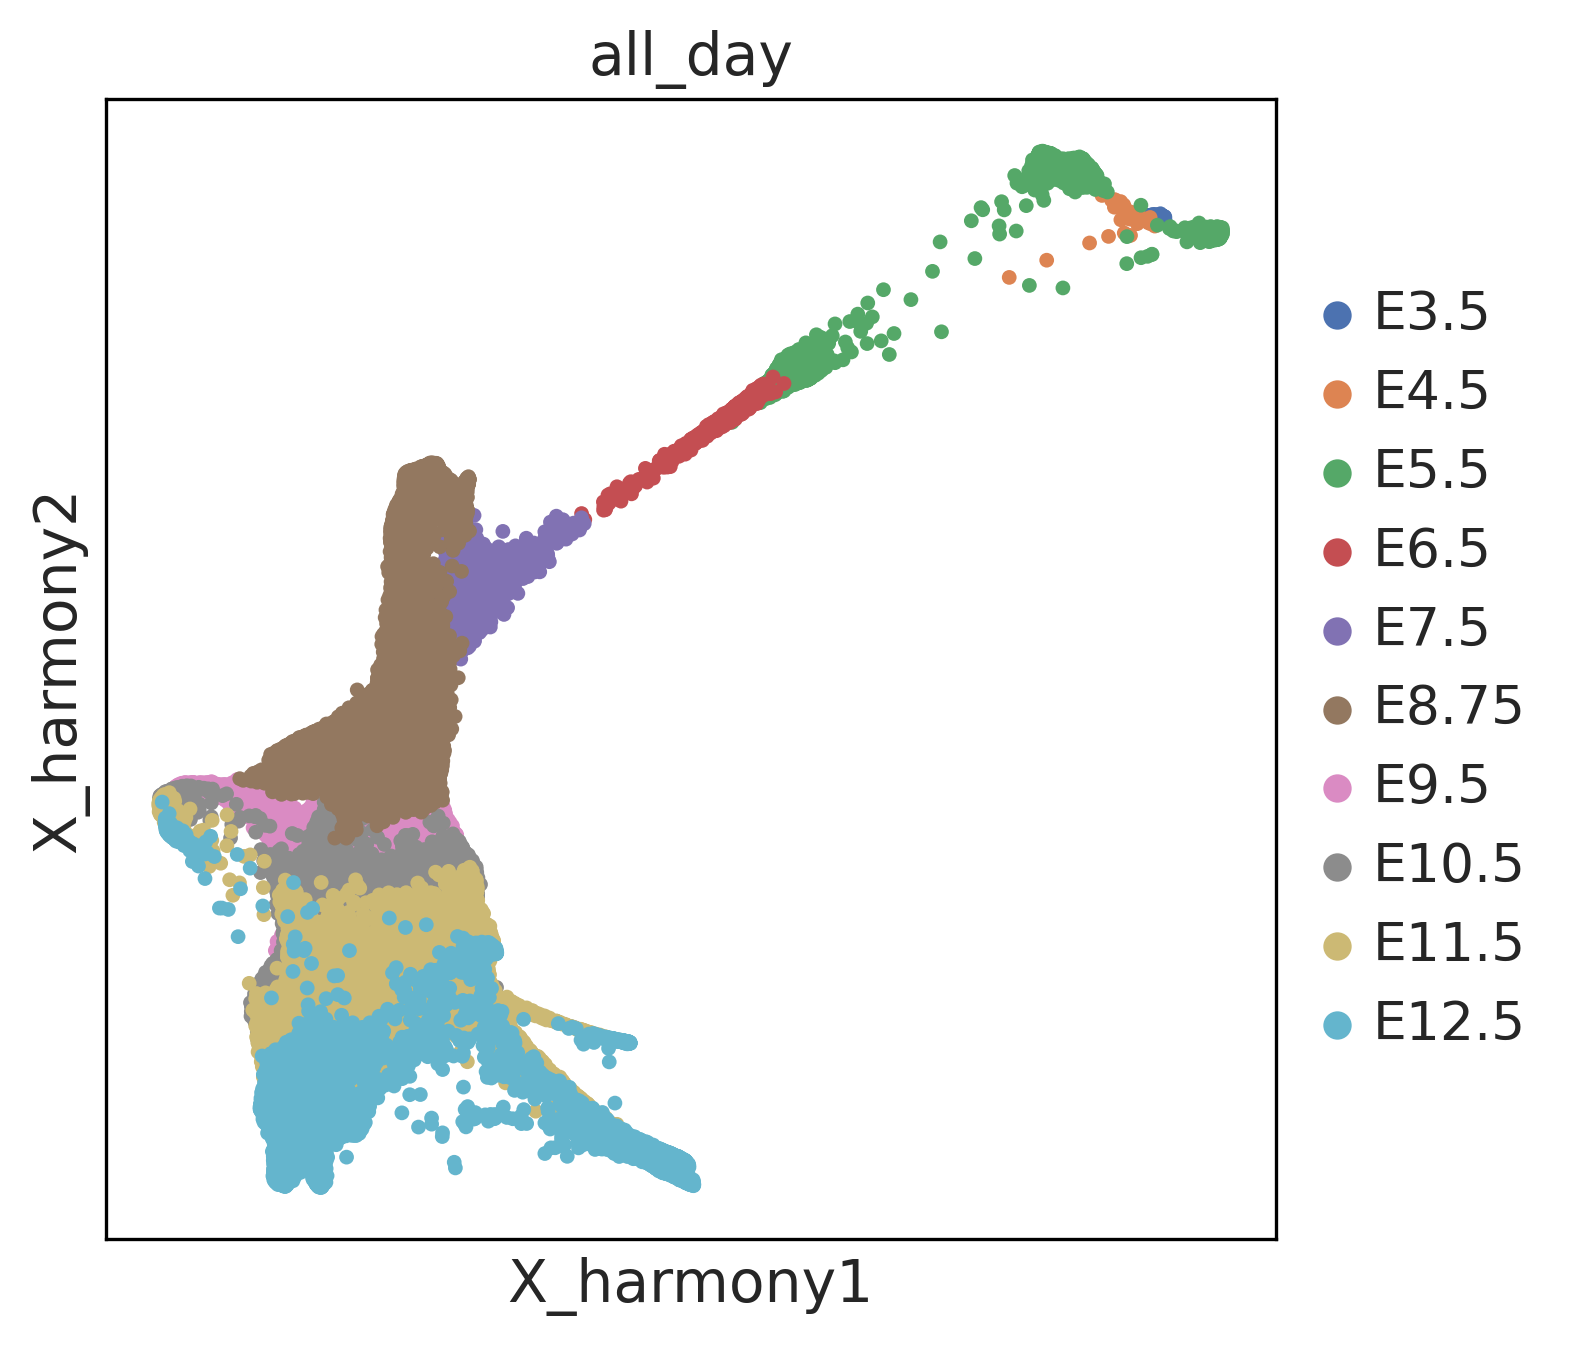

In [43]:
sc.pl.embedding(adata,basis='X_harmony',color='all_day',size=50)

### figures for manuscript

In [29]:
list1 = list(adata.uns['curated_annotation_colors'])

In [30]:
list2 = list(adata.obs['curated_annotation'].cat.categories)

In [28]:
list2

Index(['0', '1', '2', '3', '4_ctec', '5', '6_eso_&_oro_1', '7_eso_&_oro_2',
       '8_salivary', '9_thy_progen', '10', '11', '12_ubb', '13', '14', '15',
       '16', '17', '18_eso_&_oro_3', '19_pouch1', '20_eso_&_oro_4', '21',
       '22_thyroid', '23', '24', '25_mtec', '26_parathyroid', '27_respiratory',
       'P:Colon', 'P:DE', 'P:EPI', 'P:Gut tube', 'P:ICM', 'P:Liver', 'P:Lung',
       'P:Pancreas', 'P:Small int', 'P:Thymus', 'P:Thyroid'],
      dtype='object')

In [21]:
# order clusters
list_final = ['P:ICM','P:EPI','P:DE', 'P:Colon','P:Gut tube','P:Liver','P:Lung','P:Pancreas',
 'P:Small int','P:Thymus',  'P:Thyroid', '23', '13', '17','1','14','21','24','16','10','5','15',
 '0','3','11','27_respiratory','19_pouch1','8_salivary',
 '7_eso_&_oro_2','18_eso_&_oro_3','6_eso_&_oro_1','20_eso_&_oro_4',
 '22_thyroid','12_ubb','2', '26_parathyroid', '9_thy_progen','4_ctec', '25_mtec',
]

In [32]:
col_order = []
for entry in list_final:
    col_order.append(list1[list2.index(entry)])

In [36]:
import matplotlib as mpl

<ipython-input-38-e753ae243c34>:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
<ipython-input-38-e753ae243c34>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


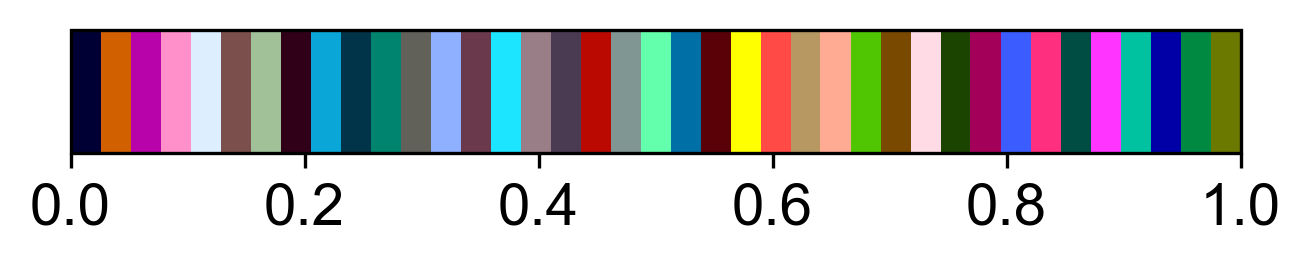

In [38]:
fig, ax = plt.subplots(figsize=(5, 1))
fig.subplots_adjust(bottom=0.5)
cmap = mpl.colors.ListedColormap(col_order)
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                # norm=norm,
                                orientation='horizontal')
# cb1.set_label('Some Units')
fig.show()
plt.savefig("./figures/colorbar_ALL_roadmap_clusters.pdf")

In [42]:
import matplotlib

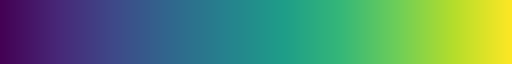

In [45]:
mymap = plt.get_cmap("viridis", len(adata.obs['all_day'].cat.categories))
mymap_hex = []
mymap_new2 = []

for i in range(mymap.N):
    mymap_new2.append(mymap(i))
    rgba = mymap(i)
    # rgb2hex accepts rgb or rgba
    mymap_hex.append(matplotlib.colors.rgb2hex(rgba))
matplotlib.colors.LinearSegmentedColormap.from_list(name='mymap',colors=mymap_new2)

In [44]:
mymap_new2

[(0.267004, 0.004874, 0.329415, 1.0),
 (0.281412, 0.155834, 0.469201, 1.0),
 (0.244972, 0.287675, 0.53726, 1.0),
 (0.190631, 0.407061, 0.556089, 1.0),
 (0.147607, 0.511733, 0.557049, 1.0),
 (0.119699, 0.61849, 0.536347, 1.0),
 (0.20803, 0.718701, 0.472873, 1.0),
 (0.430983, 0.808473, 0.346476, 1.0),
 (0.709898, 0.868751, 0.169257, 1.0),
 (0.993248, 0.906157, 0.143936, 1.0)]

In [47]:
adata.obs['all_day'].cat.categories

Index(['E3.5', 'E4.5', 'E5.5', 'E6.5', 'E7.5', 'E8.75', 'E9.5', 'E10.5',
       'E11.5', 'E12.5'],
      dtype='object')

In [49]:
adata.uns['all_day_colors']

array(['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860',
       '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd'], dtype=object)

In [54]:
adata.uns['all_day_colors'] = ['#440154',
 '#482878',
 '#3e4989',
 '#31688e',
 '#26828e',
 '#1f9e89',
 '#35b779',
 '#6ece58',
 '#b5de2b',
 '#fde725']

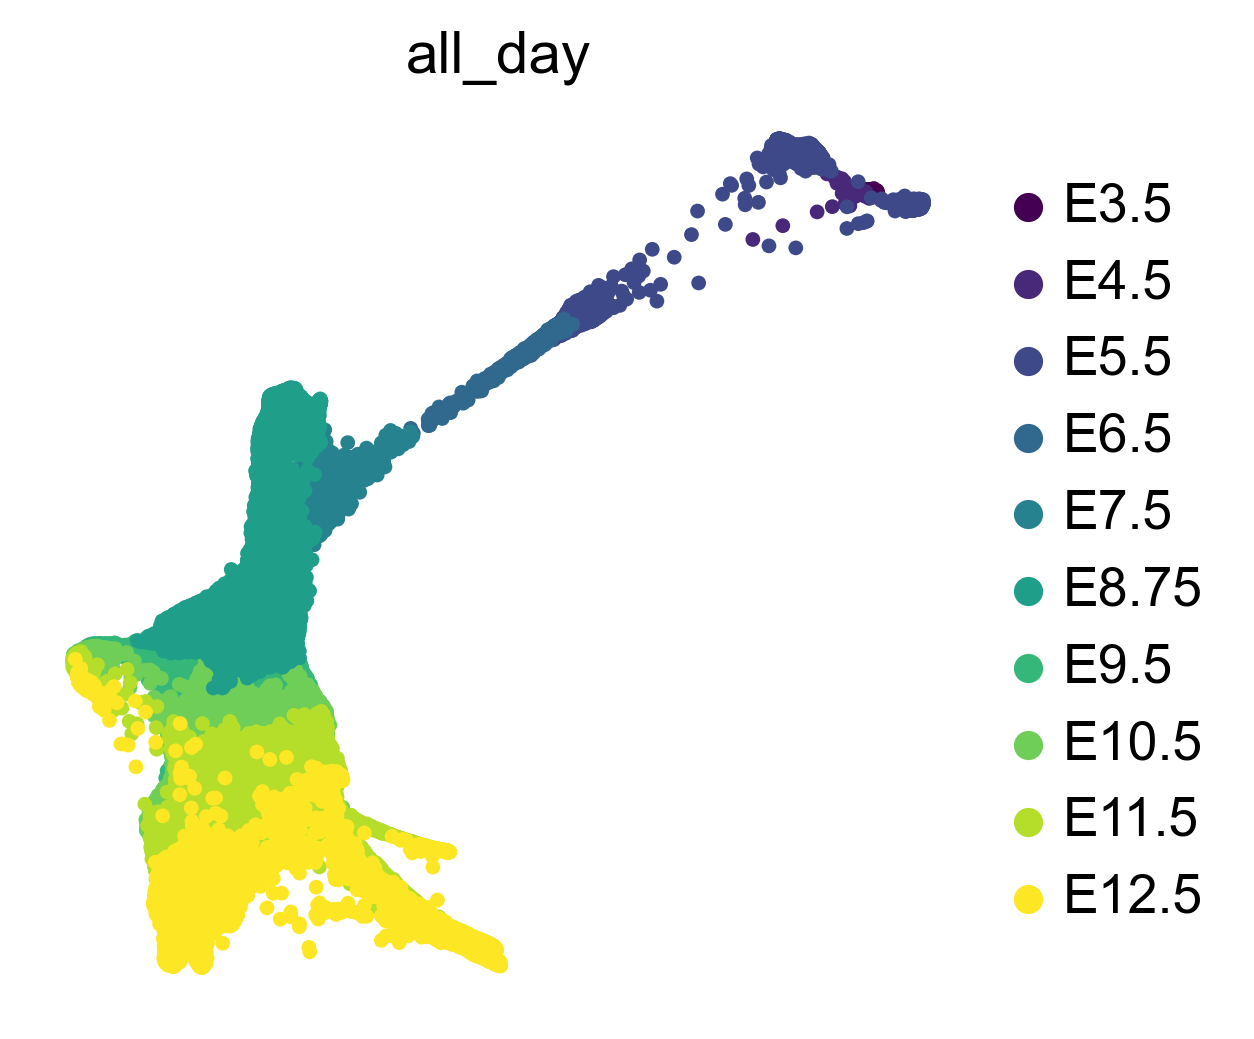

In [59]:
sc.pl.embedding(adata,basis='X_harmony',color='all_day',title=None,size=50,frameon=False,save='_eday.pdf')

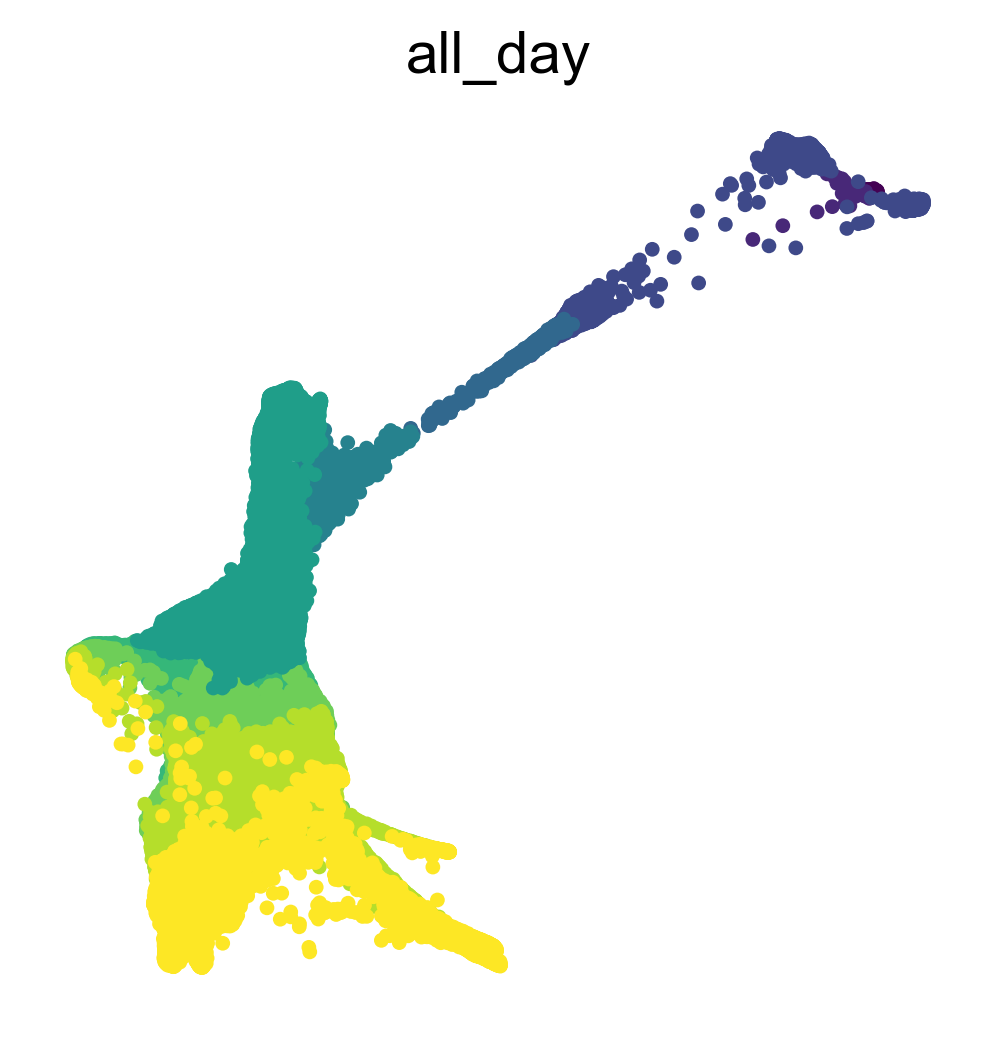

In [61]:
sc.pl.embedding(adata,basis='X_harmony',color='all_day',title=None,size=50,legend_loc=None,frameon=False,save='_eday_no_leg.pdf')

### matrixplot expression plot

### plot Supplementary 3a

In [44]:
to_plot = ['Nanog','Pou5f1',
           'Cer1','T','Sox17','Lefty1','Lefty2','Eomes','Hoxa1','Hoxa2','Hoxa4','Hoxb1','Hoxb2','Hoxb3','Hoxb4',#'Hoxc4','Hoxd1','Hoxd1','Hoxd3','Hoxd4',
           'Hic1','Pbx1','Pbx2','Meis1','Meis2','Meis3','Six1','Gbx2','Otx1','Otx2','Tfap4','Tfap2c','Isl1','Isl2','Irx1','Irx2','Irx3','Eya1',#'Fgf10',
           'Hey1',#'Bmp4',
           'Bmp1','Bmp2','Bmp3','Bmp5','Bmp6','Bmp7',
           'Hes1','Id1','Fn1','Eomes','Nodal','Fgf17','Smad7','Foxe1','Nkx2-1','Nkx2-2','Nkx2-3','Nkx2-5','Nkx2-6',
           'Rora','Rorb','Rorc','Gata3',# 'Gata4','Gata6',
           'Trp53','Trp63','Shh','Dmrt2',#'Foxp1','Foxp2',
           'Wnt5a','Ror2','Gjb2','Calca','Pax8','Hhex','Krt15','Lrrn1','Acta2','Cnn1','Ripply3',
           'Mafb','Gcm2','Pth','Foxn1','Foxg1','Il7',
           'Hoxb9','Fabp1','Ppy','Irx1','Pdx1','Vgll2','Foxa2','Sox2','Tbx1','Hoxa3','Pax9','Six1','Gjb2','Calca','Pax8','Hhex','Nkx2-1','Gata6','Krt15','Lrrn1','Acta2','Cnn1','Ripply3','Calca','Gata3','Mafb','Gcm2','Pax1','Foxn1','Il7']

In [ ]:
to_plot = list(set(to_plot))
# to_plot = list(set(to_plot))
adata_roadmap = adata_roadmap.raw.to_adata()
adata_roadmap.obs['anno'] = adata_roadmap.obs['curated_annotation'].copy()

adata_roadmap.obs['anno'] = adata_roadmap.obs['anno'].cat.reorder_categories(['P:ICM', 'P:EPI', 'P:DE', 'P:Colon', 'P:Gut tube', 'P:Liver',
                  'P:Lung', 'P:Pancreas', 'P:Small int', 'P:Thymus',
                  'P:Thyroid', '23', '13', '17', '1', '14', '21', '24', '16',
                  '10',  '5', '15', '0', '3', '11', '27_respiratory', '19_pouch1',
                  '8_salivary',
                  '7_eso_&_oro_2',
                  '18_eso_&_oro_3', '6_eso_&_oro_1', 
                  '20_eso_&_oro_4', '22_thyroid', '12_ubb', '2', '26_parathyroid','9_thy_progen', '4_ctec', '25_mtec'])

adata_roadmap.rename_categories('anno',['P:ICM', 'P:EPI', 'P:DE', 'P:Colon', 'P:Gut tube', 'P:Liver',
                  'P:Lung', 'P:Pancreas', 'P:Small int', 'P:Thymus',
                  'P:Thyroid','Early_C23','Early_C13','Early_C17', 'Early_C1',
                                        'Early_C14','Early_C21','Early_C24','Early_C16',
                                      'Mid_C10',   'Late_C5','Late_C15',
                                         'Late_C0', 'Mid_C3', 'Late_C11','Respiratory_C27',
                                        'Pouch1_C19','Pouch2_C8',
                                        'Eso&Oro_C7','Eso&Oro_C18',
                                         'Eso&Oro_C6','Eso&Oro_C20',
                                        'Thyroid_C22','Ubb_C12',
                                         'Mid_C2','Parathyroid_C26', 'ThyProgen_C9',
                                         'Ctec_C4','Mtec_C25'])                                     

res = pd.DataFrame(columns=to_plot, index=adata_roadmap.obs['anno'].cat.categories)                                                                                                 

for clust in adata_roadmap.obs.anno.cat.categories: 
    res.loc[clust] = adata_roadmap[adata_roadmap.obs['anno'].isin([clust]),to_plot].X.mean(0)
    
plot_order = []
for entry in ['P:ICM', 'P:EPI', 'P:DE', 'P:Colon', 'P:Gut tube', 'P:Liver',
                  'P:Lung', 'P:Pancreas', 'P:Small int', 'P:Thymus',
                  'P:Thyroid','Early_C23','Early_C13','Early_C17', 'Early_C1',
                                        'Early_C14','Early_C21','Early_C24','Early_C16',
                                      'Mid_C10',   'Late_C5','Late_C15',
                                         'Late_C0', 'Mid_C3', 'Late_C11','Respiratory_C27',
                                        'Pouch1_C19','Pouch2_C8',
                                        'Eso&Oro_C7','Eso&Oro_C18',
                                         'Eso&Oro_C6','Eso&Oro_C20',
                                        'Thyroid_C22','Ubb_C12',
                                         'Mid_C2','Parathyroid_C26', 'ThyProgen_C9',
                                         'Ctec_C4','Mtec_C25']:
    plot_order.extend(list(res.loc[entry,res.loc[entry,] == res.max()].index))

In [ ]:
sc.pl.matrixplot(adata_roadmap,var_names=plot_order,groupby='anno',standard_scale='var',cmap='magma',save="_roadmap_markers_new_names.pdf")

### plot Supplementary Figure 3b

In [ ]:
# doesnt take into account the size of the group for normalization
def get_cluster_proportions(adata,
                            cluster_key="cluster_final",
                            sample_key="replicate",
                            drop_values=None):
    """
    Input
    =====
    adata : AnnData object
    cluster_key : key of `adata.obs` storing cluster info
    sample_key : key of `adata.obs` storing sample/replicate info
    drop_values : list/iterable of possible values of `sample_key` that you don't want
    
    Returns
    =======
    pd.DataFrame with samples as the index and clusters as the columns and 0-100 floats
    as values
    """
    
    adata_tmp = adata.copy()
    sizes = adata_tmp.obs.groupby([cluster_key, sample_key]).size()
    props = sizes.groupby(level=1).apply(lambda x: 100 * x / x.sum()).reset_index() 
    props = props.pivot(columns=sample_key, index=cluster_key).T
    props.index = props.index.droplevel(0)
    props.fillna(0, inplace=True)
    
    if drop_values is not None:
        for drop_value in drop_values:
            props.drop(drop_value, axis=0, inplace=True)
    return props


def plot_cluster_proportions(cluster_props, 
                             cluster_palette=None,
                             xlabel_rotation=90,figdir=sc.settings.figdir,filename='proportion.png'): 
    fig, ax = plt.subplots(dpi=300)
    fig.patch.set_facecolor("white")
    
    cmap = mymap #['#1f77b4','#ff7f0e','#279e68','#d62728','#aa40fc','#e377c2','#b5bd61','#17becf','#aec7e8']
        
    cluster_props.plot(
        kind="bar", 
        stacked=True, 
        ax=ax, 
        legend=None, 
        colormap=matplotlib.colors.LinearSegmentedColormap.from_list(name='mymap',colors=mymap_new2)
    )
    
    ax.legend(bbox_to_anchor=(1.01, 1), frameon=False, title="Eday")
    sns.despine(fig, ax)
    ax.tick_params(axis="x", rotation=xlabel_rotation)
    ax.set_xlabel(cluster_props.index.name.capitalize())
    ax.set_ylabel("Proportion")
    fig.tight_layout()
    filepath = figdir + '/' + filename
    print(filepath)
    plt.savefig(filepath)
    return fig

In [ ]:
props = get_cluster_proportions(adata,"all_day","curated_annotation",)

In [ ]:
props.sort_values(by=['E3.5', 'E4.5', 'E5.5', 'E6.5', 'E7.5', 'E8.75', 'E9.5',
                  'E10.5', 'E11.5', 'E12.5'], ascending=False).index

In [ ]:
 # sort index 
props = props.reindex(['P:ICM', 'P:EPI', 'P:DE', 'P:Colon', 'P:Gut tube', 'P:Liver',
                  'P:Lung', 'P:Pancreas', 'P:Small int', 'P:Thymus',
                  'P:Thyroid', '23', '13', '17', '1', '14', '21', '24', '16',
                  '10', '22_thyroid', '27_respiratory', '19_pouch1',
                  '8_salivary', '5', '15', '0', '3', '11', '2', '12_ubb',
                  '9_thy_progen', '26_parathyroid', '7_eso_&_oro_2',
                  '18_eso_&_oro_3', '6_eso_&_oro_1', '4_ctec',
                  '20_eso_&_oro_4', '25_mtec'])

In [ ]:
# rename index 
props.index = ['P:ICM', 'P:EPI', 'P:DE', 'P:Colon', 'P:Gut tube', 'P:Liver',
                  'P:Lung', 'P:Pancreas', 'P:Small int', 'P:Thymus',
                  'P:Thyroid', 'Early_C23','Early_C13','Early_C17','Early_C1', 'Early_C14', 
                       'Early_C21','Early_C24','Early_C16', 'Mid_C10', 'Thyroid_C22', 
                       'Respiratory_C27','Pouch1_C19','Pouch2_C8', 'Late_C5','Late_C15',
                        'Late_C0',  'Mid_C3','Late_C11','Mid_C2',  'Ubb_C12','ThyProgen_C9',
                       'Parathyroid_C26','Eso&Oro_C7','Eso&Oro_C18', 'Eso&Oro_C6','Ctec_C4',
                       'Eso&Oro_C20','Mtec_C25']
                       

In [ ]:
props.index.name = 'Annotation'

In [ ]:
plt.rcParams['figure.figsize']=(16,8)

In [ ]:
plot_cluster_proportions(props,figdir='./figures/',cluster_palette='',filename='proportions_cluster_day_all_cells_final.pdf')